<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/convertidor_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

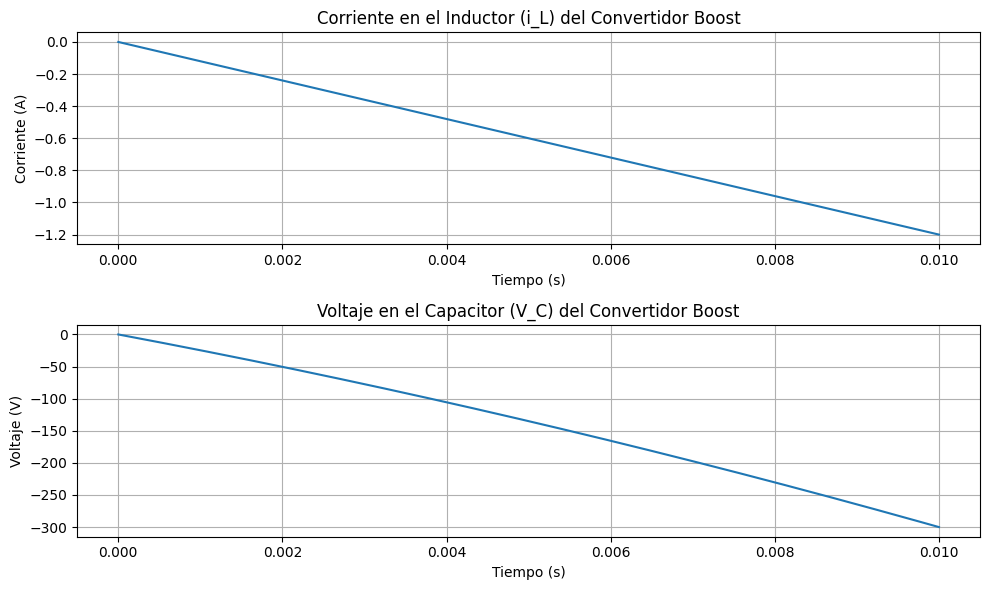

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros del convertidor boost
Vin = 12  # Voltaje de entrada en V
Vout = 24  # Voltaje de salida deseado en V (mayor que Vin)
L = 0.1  # Inductancia en henrios
C = 100e-6  # Capacitancia en faradios
Rload = 10  # Resistencia de carga en ohmios
Iload = Vout / Rload  # Corriente de carga
fsw = 100e3  # Frecuencia de conmutación en Hz

# Ecuaciones diferenciales para el convertidor boost
def boost_converter(y, t, Vin, Vout, L, C, Rload):
    i_L, V_C = y  # i_L es la corriente en el inductor y V_C es el voltaje en el capacitor
    di_L_dt = (Vin - Vout) / L  # Ecuación de la corriente en el inductor (simétrica con el buck)
    dV_C_dt = (i_L - Iload) / C  # Ecuación de la tensión en el capacitor (simétrica con el buck)
    return [di_L_dt, dV_C_dt]

# Condiciones iniciales
i_L0 = 0  # Corriente inicial en el inductor
V_C0 = 0  # Voltaje inicial en el capacitor
y0 = [i_L0, V_C0]

# Tiempo de simulación (10 milisegundos)
t = np.linspace(0, 0.01, 1000)  # 10 ms, 1000 puntos

# Resolver la ecuación diferencial
sol = odeint(boost_converter, y0, t, args=(Vin, Vout, L, C, Rload))

# Extraer la corriente del inductor y el voltaje del capacitor
i_L = sol[:, 0]
V_C = sol[:, 1]

# Graficar la corriente en el inductor y el voltaje del capacitor
plt.figure(figsize=(10, 6))

# Corriente en el inductor
plt.subplot(2, 1, 1)
plt.plot(t, i_L)
plt.title("Corriente en el Inductor (i_L) del Convertidor Boost")
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.grid(True)

# Voltaje en el capacitor
plt.subplot(2, 1, 2)
plt.plot(t, V_C)
plt.title("Voltaje en el Capacitor (V_C) del Convertidor Boost")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid(True)

plt.tight_layout()
plt.show()
